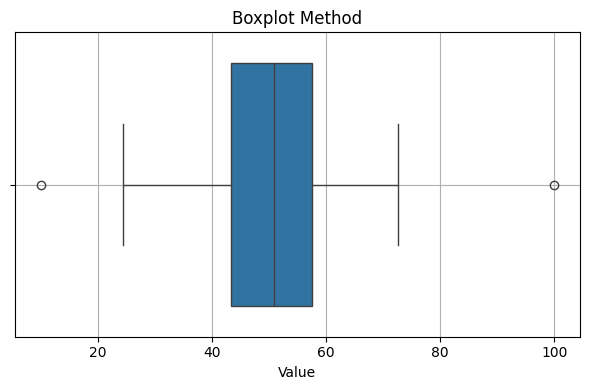

     value   z_score  z_outlier  iqr_outlier  combined_outlier
100   10.0 -3.442528       True         True              True
101  100.0  4.172862       True         True              True


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Sample dataset with outliers
np.random.seed(0)
data = np.concatenate([np.random.normal(50, 10, 100), np.array([10, 100])])
df = pd.DataFrame({'value': data})

# Z-score method
df['z_score'] = zscore(df['value'])
df['z_outlier'] = np.abs(df['z_score']) > 3

# IQR method
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['iqr_outlier'] = (df['value'] < lower_bound) | (df['value'] > upper_bound)

# Boxplot method (same as IQR, visualized)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['value'])
plt.title("Boxplot Method")
plt.xlabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Combine all methods
df['combined_outlier'] = df[['z_outlier', 'iqr_outlier']].any(axis=1)
outliers = df[df['combined_outlier']]
print(outliers)
